In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [2]:
import warnings
warnings.filterwarnings("ignore", category = DeprecationWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

## Veri Seti hikayesi ve Problem: Seker Hastaligi Tahmini

In [4]:
df = pd.read_csv("./diabetes.csv")

In [5]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Lojistik Regresyon(Logistic Regression)

### Model&Tahmin

In [7]:
df["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [9]:
y = df["Outcome"] #bu bizim bagimli degiskenimiz.
X = df.drop(["Outcome"],axis=1)


In [10]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [11]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
loj_model = LogisticRegression(solver = "liblinear").fit(X,y)

In [13]:
loj_model.intercept_

array([-5.87567981])

In [14]:
loj_model.coef_

array([[ 1.17026040e-01,  2.83447017e-02, -1.69142223e-02,
         7.58028032e-04, -6.38933355e-04,  5.95883532e-02,
         6.74657098e-01,  7.19078501e-03]])

In [15]:
loj_model.predict(X)[0:10]

array([1, 0, 1, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [16]:
y[0:10]

0    1
1    0
2    1
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: Outcome, dtype: int64

In [17]:
y_pred = loj_model.predict(X)

In [19]:
confusion_matrix(y,y_pred)

array([[448,  52],
       [121, 147]], dtype=int64)

In [21]:
accuracy_score(y,y_pred)

0.7747395833333334

In [22]:
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.77       768
   macro avg       0.76      0.72      0.73       768
weighted avg       0.77      0.77      0.77       768



In [23]:
loj_model.predict_proba(X)[0:10]

array([[0.35093834, 0.64906166],
       [0.9167465 , 0.0832535 ],
       [0.22496175, 0.77503825],
       [0.92105964, 0.07894036],
       [0.16807458, 0.83192542],
       [0.79857716, 0.20142284],
       [0.87973055, 0.12026945],
       [0.27755404, 0.72244596],
       [0.32068936, 0.67931064],
       [0.9223939 , 0.0776061 ]])

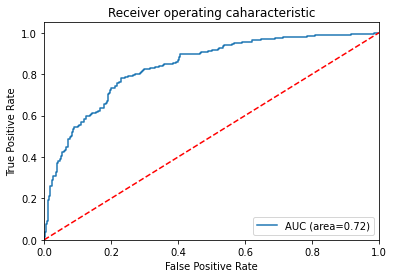

In [27]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))
fpr, tpr, thresholds = roc_curve(y,loj_model.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='AUC (area=%0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating caharacteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

### Model Tuning

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.30,
                                                   random_state=42)

In [29]:
loj_model = LogisticRegression(solver = "liblinear").fit(X_train,y_train)

In [30]:
y_pred = loj_model.predict(X_test)

In [31]:
print(accuracy_score(y_test,y_pred)) #bu bizim test seti hatamiz, train icin gerceklestirmedik.

0.7532467532467533


In [36]:
cross_val_score(loj_model, X_test, y_test, cv=10).mean()

0.7661231884057971

# K-En yakin Komsu

In [6]:
y = df["Outcome"] #bu bizim bagimli degiskenimiz.
X = df.drop(["Outcome"],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X,
                                                   y,
                                                   test_size=0.30,
                                                   random_state=42)

### Model&Tahmin

In [7]:
knn_model = KNeighborsClassifier().fit(X_train, y_train)

In [8]:
knn_model

KNeighborsClassifier()

In [9]:
y_pred = knn_model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.6883116883116883

In [11]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.77      0.75      0.76       151
           1       0.55      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



### Model Tuning

In [12]:
knn = KNeighborsClassifier()

In [16]:
knn_params = {"n_neighbors": np.arange(1,50)}

In [17]:
np.arange(1,50)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])

In [18]:
knn_cv_model = GridSearchCV(knn, knn_params, cv=10).fit(X_train,y_train)

In [19]:
knn_cv_model.best_score_

0.748637316561845

In [20]:
knn_cv_model.best_params_

{'n_neighbors': 11}

In [21]:
#final modeli

In [22]:
knn_tuned = KNeighborsClassifier(n_neighbors=11).fit(X_train,y_train)

In [23]:
y_pred = knn_tuned.predict(X_test)

In [24]:
accuracy_score(y_test,y_pred) #basari orani 68'den 73'e cikti, ilkel veriye gore daha basarili olundu.

0.7316017316017316

In [25]:
knn_tuned.score(X_test,y_test) #y_pred yapmak yerine score'u kullanarak sonuca ulasabiliriz, daha pratik kullanimidir.

0.7316017316017316